In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-dataset/Covid Data.csv


Data description (source: https://www.kaggle.com/datasets/meirnizri/covid19-dataset)

The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. 

**In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.**

- **sex:** 1 for female and 2 for male.
- **age:** of the patient.
- **classification:** covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- **patient type:** type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- **pneumonia:** whether the patient already have air sacs inflammation or not.
- **pregnancy:** whether the patient is pregnant or not.
- **diabetes:** whether the patient has diabetes or not.
- **copd:** Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- **asthma:** whether the patient has asthma or not.
- **inmsupr:** whether the patient is immunosuppressed or not.
- **hypertension:** whether the patient has hypertension or not.
- **cardiovascular:** whether the patient has heart or blood vessels related disease.
- **renal chronic:** whether the patient has chronic renal disease or not.
- **other disease:** whether the patient has other disease or not.
- **obesity:** whether the patient is obese or not.
- **tobacco:** whether the patient is a tobacco user.
- **usmr:** Indicates whether the patient treated medical units of the first, second or third level.
- **medical unit:** type of institution of the National Health System that provided the care.
- **intubed:** whether the patient was connected to the ventilator.
- **icu:** Indicates whether the patient had been admitted to an Intensive Care Unit.
- **date died:** If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [2]:
#import data
data = pd.read_csv('/kaggle/input/covid19-dataset/Covid Data.csv')

#having a first look at the data
data.head()
data.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [3]:
#having a look at the columns names
data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

<AxesSubplot:xlabel='AGE', ylabel='Count'>

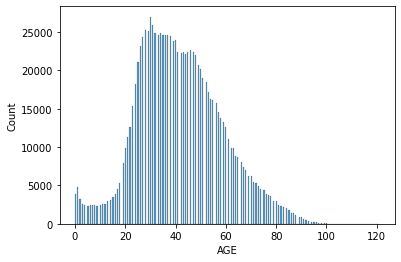

In [4]:
#age exploration

#calculate the mean age of the patients included in the dataset 
data_age_mean = data['AGE'].mean()

#calculate the median age of the patients included in the dataset 
data_age_median = data['AGE'].median()
data_age_median 

#build a histogram to see the data distribution
sns.histplot(data['AGE']) 

The data don't looks normal distributed; we have a gap on ages < 20 until the age of 0 and a little skew to the right. Let's see how it behaves according to the disease classification

<AxesSubplot:xlabel='AGE', ylabel='Count'>

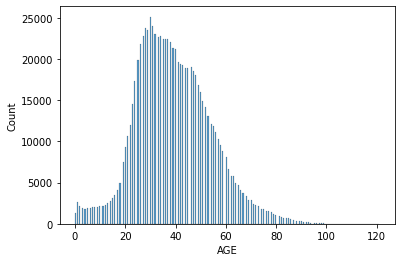

In [5]:
#relationship between age and covid-19 hospitalization

#patients diagnosed with COVID without the necessity of hospitalization

#data distribution
sns.histplot(data['AGE'].loc[(data.PATIENT_TYPE == 1)]) 

<AxesSubplot:xlabel='AGE', ylabel='Count'>

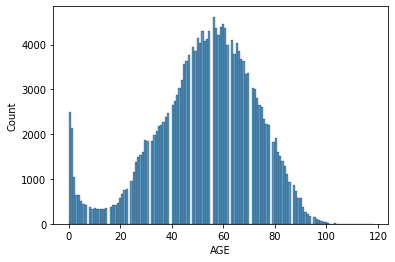

In [6]:
#patients diagnosed with COVID with degree 1
sns.histplot(data['AGE'].loc[(data.PATIENT_TYPE == 2)]) 

We have a lot more individuals that needed hospitalization and we have two clear agre groups that looks more susceptible to need hospitalization when infected: **early infants** with age nearly to 0 years and **elderly people** around 60's


<AxesSubplot:xlabel='AGE', ylabel='Count'>

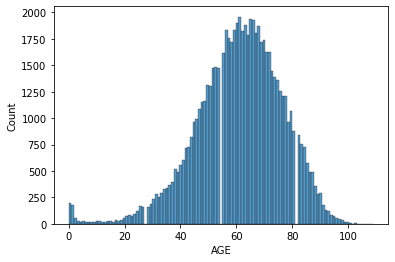

In [7]:
#lets see the distribution of age of patients with COVID-19 who died
sns.histplot(data['AGE'].loc[(data.PATIENT_TYPE == 2) & (data.DATE_DIED != '9999-99-99')]) 

We can see that although a lot of early infants are hospitalized, less than 1/4 die. On the other hand, in the elderly population, hospitalization looks like a bigger risk factor of dead, beacause nearly half of the people around 60's who were hospitalized died. 

In [8]:
#leets see how the genre relates to age and covid-19 death

#see how many males and females we have in the dataset
n_females = data['SEX'].loc[(data.SEX == 1)].count()
n_males = data['SEX'].loc[(data.SEX == 2)].count()
print('n_females: ', n_females, 'n_males :', n_males, 'abs_diff: ', abs(n_females-n_males))

n_females:  525064 n_males : 523511 abs_diff:  1553


We can see we have more females than males, but the difference is not so large so we propably don't have a significant bias on this variable

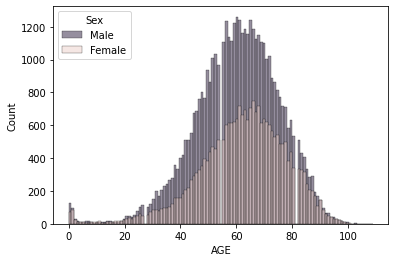

In [9]:
#leets see how the genre relates to age and covid-19 death
hospitalized_and_death = data.loc[(data.PATIENT_TYPE == 2) & (data.DATE_DIED != '9999-99-99')]

g = sns.histplot(data=hospitalized_and_death, x='AGE', hue='SEX', color='red')
plt.legend(title='Sex', loc='upper left', labels=['Male', 'Female'])
plt.show(g)

We can see that although we have more females in the dataset, the majority of deaths of hospitalized patients are from males. This could indicate a correlation between genre and COVID-19 severity